### 数据结构与算法 学习笔记（6）: 栈和队列 综合应用
本次笔记记录了近段时间刷LeetCode时遇到的关于栈和队列应用的一些问题，并下文中给出了相应的思路说明和代码，题目编号与LeetCode对应。如发现错漏或更好的方法，欢迎到文末的github中pull request。
#### 题目1： 71. Simplify Path
Given an absolute path for a file (Unix-style), simplify it. Or in other words, convert it to the canonical path.

In a UNIX-style file system, a period . refers to the current directory. Furthermore, a double period .. moves the directory up a level. For more information, see: Absolute path vs relative path in Linux/Unix

Note that the returned canonical path must always begin with a slash /, and there must be only a single slash / between two directory names. The last directory name (if it exists) must not end with a trailing /. Also, the canonical path must be the shortest string representing the absolute path.

 

Example :

Input: "/../"
Output: "/"
Explanation: Going one level up from the root directory is a no-op, as the root level is the highest level you can go.

Input: "/home//foo/"
Output: "/home/foo"
Explanation: In the canonical path, multiple consecutive slashes are replaced by a single one.

Input: "/a/./b/../../c/"
Output: "/c"


```python
"""
重点：利用"/"将整个str分割为list。
1.将path分割，去掉所有"/"
2.遍历list内容，进行相应操作
3.最后剩下的list元素之间补上“/”，开头补上“/” 
4.注意：list转换成str返回，需要用join函数 '*'之间的*为想要填入的分隔符*
"""
class Solution(object):
    def simplifyPath(self, path):
        """
        :type path: str
        :rtype: str
        """
        stack =[]
        for token in path.split('/'):
            if token in ('', '.'):
                pass
            elif token == '..':
                if stack: stack.pop()
            else:
                stack.append(token)
        return '/' + '/'.join(stack)
```
#### 题目2： 150. Evaluate Reverse Polish Notation

Evaluate the value of an arithmetic expression in Reverse Polish Notation.Valid operators are +, -, *, /. Each operand may be an integer or another expression.

Note:
Division between two integers should truncate toward zero.
The given RPN expression is always valid. That means the expression would always evaluate to a result and there won't be any divide by zero operation.

Example:

Input: ["2", "1", "+", "3", "*"]
Output: 9
Explanation: ((2 + 1) * 3) = 9

Input: ["4", "13", "5", "/", "+"]
Output: 6
Explanation: (4 + (13 / 5)) = 6
```python
"""
这题是考察逆波兰表达式的计算方法（即后缀表达式）
用栈即可，遇到符号弹出栈顶的两个，进行运算，结果存入栈中，没遇到符号把数字压入栈中
最后返回栈顶元素，其实就一个元素 ，即为表达式的值
注意：除法需要考虑整除，正负，向上取整还是向下取整
"""
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:

        stack = []
        operater=['+','-','*','/']
        for ch in tokens:
            if ch in operater:
                y = int(stack.pop())
                x = int(stack.pop())
                if ch == "+":
                    stack.append( x + y )
                if ch == "-":
                    stack.append( x - y )
                if ch == "*":
                    stack.append( x * y )
                if ch == "/":
                    if x*y<0 and x%y !=0: 
                        stack.append( x // y +1)
                    else:
                        stack.append( x//y )
            else:
                stack.append(int(ch))
        return stack.pop()
```
#### 题目3：341. Flatten Nested List Iterator

Given a nested list of integers, implement an iterator to flatten it.

Each element is either an integer, or a list -- whose elements may also be integers or other lists.

Example :

Input: [[1,1],2,[1,1]]
Output: [1,1,2,1,1]
Explanation: By calling next repeatedly until hasNext returns false, 
             the order of elements returned by next should be: [1,1,2,1,1].


Input: [1,[4,[6]]]
Output: [1,4,6]
Explanation: By calling next repeatedly until hasNext returns false, 
             the order of elements returned by next should be: [1,4,6].
```python
# """
# This is the interface that allows for creating nested lists.
# You should not implement it, or speculate about its implementation
# """
#class NestedInteger(object):
#    def isInteger(self):
#        """
#        @return True if this NestedInteger holds a single integer, rather than a nested list.
#        :rtype bool
#        """
#
#    def getInteger(self):
#        """
#        @return the single integer that this NestedInteger holds, if it holds a single integer
#        Return None if this NestedInteger holds a nested list
#        :rtype int
#        """
#
#    def getList(self):
#        """
#        @return the nested list that this NestedInteger holds, if it holds a nested list
#        Return None if this NestedInteger holds a single integer
#        :rtype List[NestedInteger]
#        """
"""
较简单，见代码就ok
"""
class NestedIterator(object):

    def __init__(self, nestedList):
        """
        Initialize your data structure here.
        :type nestedList: List[NestedInteger]
        """
        self.stack = nestedList[::-1]
        
    def next(self):
        """
        :rtype: int
        """
        return self.stack.pop().getInteger()
        
    def hasNext(self):
        """
        :rtype: bool
        """
        while self.stack:
            top = self.stack[-1]
            if top.isInteger():
                return True
            self.stack = self.stack[:-1] + top.getList()[::-1]
        return False
        

# Your NestedIterator object will be instantiated and called as such:
# i, v = NestedIterator(nestedList), []
# while i.hasNext(): v.append(i.next())
```
#### 题目4：394. Decode String

Given an encoded string, return it's decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; No extra white spaces, square brackets are well-formed, etc.

Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there won't be input like 3a or 2[4].

Examples:

s = "3[a]2[bc]", return "aaabcbc".
s = "3[a2[c]]", return "accaccacc".
s = "2[abc]3[cd]ef", return "abcabccdcdcdef".
```python
"""
分析：初步分析此题需要用栈来实现，但是不知如何表达重复和嵌套的过程
查阅讨论区，理清思路：
0.栈是肯定得用，在栈中存储字符和重复次数list对，[str,k]，代表str字符段需要重复k次
1.重复： 实现可以用 字符串 *k 来实现,这种实现了字符串的重复
2.嵌套： 实现可以用 将反括号之前的元素一个一个拼接到栈的顶部的字符中str后 解决嵌套问题 
"""
class Solution(object):
    def decodeString(self, s):
        """
        :type s: str
        :rtype: str
        """
        stack = []
        stack.append(["", 1]) #栈底，用来方便后一个栈元素的嵌套，并且不影响输出
        num = ""
        for ch in s:
            if ch.isdigit():
                num += ch #如果是数字，则记录到num
            elif ch == '[':
                stack.append(["", int(num)]) #碰到左括号，记录list对，保存信息
                num = "" # 记得恢复num为空，遇到下个数字才不会把前面的数字拼接起来
            elif ch == ']':
                st, k = stack.pop() #获取字符段和重复次数
                stack[-1][0] += st*k 
                #st*k表示将st重复k遍，如a*3 == aaa，注意重复后需要加入到新的栈顶str后，脱去嵌套
            else:
                stack[-1][0] += ch 
                #这一步很重要，将字符拼接到栈顶的字符段，处理多个字符在括号中的情况
        return stack[0][0]   #最后返回解码的字符串
```
#### 题目5：402. Remove K Digits
Given a non-negative integer num represented as a string, remove k digits from the number so that the new number is the smallest possible.

Note:
The length of num is less than 10002 and will be ≥ k.
The given num does not contain any leading zero.

Example :

Input: num = "1432219", k = 3
Output: "1219"
Explanation: Remove the three digits 4, 3, and 2 to form the new number 1219 which is the smallest.

Input: num = "10200", k = 1
Output: "200"
Explanation: Remove the leading 1 and the number is 200. Note that the output must not contain leading zeroes.

Input: num = "10", k = 2
Output: "0"
Explanation: Remove all the digits from the number and it is left with nothing which is 0.
```python
"""
此题一开始没有想到如何设计逻辑过程，参看讨论区后，整理得：
1.首先是需要依次读取num中的数字
2.第一个数直接压入栈中，如果栈为空也直接把数字压入栈
3.其它数，如果栈顶中的元素大于当前的数，可以由当前数替代栈顶的数，得到更小的组合，依次读取和比较
4.什么时候停止？ 由于我们只需要删除K位，因此当 k从设定值 减小到 0 就可以退出
5.最后返回得到的栈，转换成字符串输出
注意：
返回的字符串可能是0开头的，去掉0；
可能不是len(num)-k位，需要去掉末尾多出来的m（1~k）个；
如果栈空，join就是空的，我们需要按照题意补充一个0返回
"""
class Solution(object):
    def removeKdigits(self, num, k):
        """
        :type num: str
        :type k: int
        :rtype: str
        """
        out = []
        for d in num:
            while k and out and out[-1] > d:
                out.pop()
                k -= 1
            out.append(d)
        return ''.join(out[:-k or None]).lstrip('0') or '0'
        # out [: -k ] 取的是 out去掉栈顶k个元素剩下的部分；
        # 如果num 有部分是递增的，可能 num中的后几个会加入到栈中，此时k != 0,需要去除后几个（因为要         删去k个元素，但是在前面没有删除掉k个）
        # out [: None ] 取的是 out所有元素
        # lstrip('0') 为了删除数字开头的零
        # 如果out为空，按照题目说明 需要返回’0‘
```
#### 题目6：456. 132 Pattern

Given a sequence of n integers a1, a2, ..., an, a 132 pattern is a subsequence ai, aj, ak such that i < j < k and ai < ak < aj. Design an algorithm that takes a list of n numbers as input and checks whether there is a 132 pattern in the list.

Note: n will be less than 15,000.

Example 1:
Input: [1, 2, 3, 4]

Output: False

Explanation: There is no 132 pattern in the sequence.
Example 2:
Input: [3, 1, 4, 2]

Output: True
```python
"""

思考：遇到三个元素同时操作的，可以考虑把两个元素构成list当做一个元素存入栈中
1.首先，如果这个列表长度小于3，肯定不存在132pattern，返回false;
2.首先在stack里存入以nums[0]，nums[0]构成的列表，第一个位置代表小元素，第二个位置代表大元素
3.记录当前小元素为minimum,开始遍历nums
4.如果有，每次在stack[-1][0]的位置存入更小的元素，在stack[-1][1]的位置存入更大的元素
5.遇到满足132pattern时，返回true
6.如果遍历整个列表都没找到132pattern,也返回False

*****
不好理解的话，可以用两个实例 nums1 =[1,3,4,2],nums2 = [1,3,0,4,2] 来代入观察算法运行过程
*****

"""
class Solution(object):
    def find132pattern(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """     
        if len(nums) < 3:
            return False

        stack = [[nums[0], nums[0]]]
        minimum = nums[0]
        for num in nums[1:]:
            if num <= minimum:
                minimum = num
            else:
                while stack and num > stack[-1][0]:
                    if num < stack[-1][1]:
                        return True
                    else:
                        stack.pop()
                stack.append([minimum, num])

        return False
```
#### 题目7：503. Next Greater Element II

Given a circular array (the next element of the last element is the first element of the array), print the Next Greater Number for every element. The Next Greater Number of a number x is the first greater number to its traversing-order next in the array, which means you could search circularly to find its next greater number. If it doesn't exist, output -1 for this number.

Example 1:
Input: [1,2,1]
Output: [2,-1,2]
Explanation: The first 1's next greater number is 2; 
The number 2 can't find next greater number; 
The second 1's next greater number needs to search circularly, which is also 2.

```python
"""
方法1：
思想很直观，就是寻找当前元素后面的位置是否存在更大的元素。
1.大循环为表中每个元素寻找 greater element
2.小循环记录信息，由于最后一个元素的后面是第一个元素，采取取模就行

方法2： 时间复杂度更低
"""
class Solution(object):
    def nextGreaterElements(self, nums):
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        
        #方法1 两层循环嵌套比较 时间复杂度为 0(n^2) 能通过，但很慢
        
        """
        stack = []
        n = len(nums)
        for i in range(n):
            j = (i + 1) % n
            k = j
            while nums[i] >= nums[j]:
                j = (j + 1) % n
                if j == k:
                    stack.append(-1)
                    break
            if nums[i] < nums[j]:
                stack.append(nums[j])
        return stack
        """
        

        #方法2 时间复杂度更低
        n = len(nums)
        ret = [-1] * n
        stack = nums[::-1]
        for i in range(n - 1, -1, -1): # 倒序 i 从 n-1 到 0
            while stack and stack[-1] <= nums[i]:
                stack.pop()
            if stack:
                ret[i] = stack[-1]
            stack.append(nums[i])
        return ret
```
#### 题目8：739. Daily Temperatures

Given a list of daily temperatures T, return a list such that, for each day in the input, tells you how many days you would have to wait until a warmer temperature. If there is no future day for which this is possible, put 0 instead.

For example, given the list of temperatures T = [73, 74, 75, 71, 69, 72, 76, 73], your output should be [1, 1, 4, 2, 1, 1, 0, 0].

Note: The length of temperatures will be in the range [1, 30000]. Each temperature will be an integer in the range [30, 100].
```python
""" 重点
常见题型：这种找后面更大或者更少元素（不论是返回元素还是下标），都是要“构造” 递减序列（递增序列）
a.用一个栈存 不满足递减（增）的元素（值或下标，看题目返回什么）
b.用另一个表存每个位置元素要求的输出

"""
class Solution(object):
    def dailyTemperatures(self, T):
        """
        :type T: List[int]
        :rtype: List[int]
        """
        ans = [0] * len(T) #首先置0，没有更高温度的位置默认为0
        stack = [] #存的是暂未找到更高温度的元素的下标
        for i, t in enumerate(T): 
            while stack and T[stack[-1]] < t: # 构造的递减序列
                cur = stack.pop() # 发现不满足递减，就把栈顶的元素弹出（就是下标cur），
                ans[cur] = i - cur # ans就是下一个比它大的温度和当前下标cur元素之间的位置间隔 
            stack.append(i) #记录暂没有更高温度的元素下标

        return ans #返回题目要求，每个位置元素和其后更高温度的元素之间的距离（下标之差）
```
#### 题目9：496. Next Greater Element I

You are given two arrays (without duplicates) nums1 and nums2 where nums1’s elements are subset of nums2. Find all the next greater numbers for nums1's elements in the corresponding places of nums2.

The Next Greater Number of a number x in nums1 is the first greater number to its right in nums2. If it does not exist, output -1 for this number.

Example 1:
Input: nums1 = [4,1,2], nums2 = [1,3,4,2].
Output: [-1,3,-1]
Explanation:
    For number 4 in the first array, you cannot find the next greater number for it in the second array, so output -1.
    For number 1 in the first array, the next greater number for it in the second array is 3.
    For number 2 in the first array, there is no next greater number for it in the second array, so output -1.
```python
"""
此题题目表述不清，可参考discuss中的描述
目标：为nums1中每个位置的元素，在nums2中找到和它相等的元素，然后再寻找，是否后面有更大的元素。
方法1：根据以上描述，翻译成代码
    1.用一个flag来表示是否找到了相等元素，然后在判断后边是否有大于它的元素
    2.有的话压入栈中，没有的话压入-1.
    
    两层循环嵌套，时间复杂度为 o(mn),m和n分别为 nums1和nums2的长度 平方时间复杂度
    
方法2：方法1没考虑nums1的元素是nums2元素的子集
    由于nums1中的数值都是nums2中的数值，所以如果我们找出nums2中所有元素的greater element
    那么，给出任意一个由nums2抽取出来的nums1，我们都可以直接读出其greater element
    注意：把greater element的放在字典里，键值是其greater element 没有的放在stack里
    最后遍历nums1的元素，如果其在stack中，记录-1,如果其在dict中，记录其键值
    
    这种方法把两层循环嵌套变成了两个单独循环 时间复杂度下降为 o(m+n) 线性时间复杂度
    
"""
class Solution(object):
    def nextGreaterElement(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """
        #方法1
        """
        stack = []
        for i in range(len(nums1)):
            flag = 0
            for j in range(len(nums2)):
                if nums1[i] == nums2[j]:
                    flag = 1
                if flag == 1 and nums1[i] < nums2[j]:
                    stack.append(nums2[j])
                    break
                if flag == 1 and j == len(nums2)-1 and nums1[i] >= nums2[j]:
                    stack.append(-1)
        return stack
        """
        
        #方法2 beat 100%
        
        
        dic = {}
        stack = []
        
        #构造递减序列stack，和dic
        for i in range(len(nums2)):
            while stack and nums2[i]> stack [-1]:
                dic[stack.pop()] = nums2[i] 
                # 有greater elemter的放在字典里，并记录其
            stack.append(nums2[i]) #没有greater element 的放在stack里
            
        
        res = []
        for x in nums1: 
            if x in dic: #如果x是字典的某一键值，那么其value就是greater element
                res.append(dic[x])
            else: #否则，没有greater elemnet， res后接-1
                res.append(-1) 
        return res
```
#### 题目10：20. Valid Parentheses

Given a string containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Note that an empty string is also considered valid.

Example :

Input: "()[]{}"
Output: true


Input: "([)]"
Output: false

Input: "{[]}"
Output: true
```python
"""
思路：用栈入栈出来做括号的匹配
1.先把括号用字典进行配对，方便比较操作
2.读取s中的字符，如果不是任何一个左右括号，返回False
3.如果是左括号，存入栈中；
4.如果是右括号，判断栈中是否有左括号
    1rd若没有,说明S中的右括号出现在左括号之前，返回False;
    2rd若有，是否能和最后一个进入栈中的左括号匹配，不成功则返回False,成功则读取s的下一个字符
5.读取完所有的字符后，若stack中没有任何字符，说明匹配了；反之则未匹配
"""
class Solution(object):
    def isValid(self, s):
        """
        :type s: str
        :rtype: bool
        """
        stack = []
        dict = {"]":"[", "}":"{", ")":"("}
        for char in s:
            if char in dict.values():
                stack.append(char)
            elif char in dict.keys():
                if  stack == []:
                    return False
                elif dict[char] != stack.pop():
                    return False
            else: #s中有不在字典中的字符
                return False
        if stack == []:
            return True
        else:
            return False
```
#### 题目11：155. Min Stack

Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.

push(x) -- Push element x onto stack.
pop() -- Removes the element on top of the stack.
top() -- Get the top element.
getMin() -- Retrieve the minimum element in the stack.
Example:
MinStack minStack = new MinStack();
minStack.push(-2);
minStack.push(0);
minStack.push(-3);
minStack.getMin();   --> Returns -3.
minStack.pop();
minStack.top();      --> Returns 0.
minStack.getMin();   --> Returns -2.
```python
"""
方法1：
    通过List来实现 stack，getMin()操作时间复杂度较高 o(n)
方法2：
    同样是通过list实现，但getMin()的时间复杂度为0（1），因此很快
    1. push()作了修改，每次push两个元素进栈，
    一个是当前想要push的元素x和栈中最小元素的 min，每次存储在[-2]的位置上
    另一个就是想要push的元素x，存储在[-1]的位置上 o(2) 
    2. pop（）同样修改，每次删除两个元素 o(2)
    3. top（）不用修改 ，o(1)

"""

class MinStack(object):
    
    #方法1 o(n)复杂度
    
    '''
    def __init__(self):
        """
        initialize your data structure here.
        """
        self.elems = []

    def push(self, x):
        """
        :type x: int
        :rtype: None
        """
        self.elems.append(x)

    def pop(self):
        """
        :rtype: None
        """
        if self.elems:
            self.elems.pop()

    def top(self):
        """
        :rtype: int
        """
        if self.elems:
            return self.elems[-1]
        
    def getMin(self):
        """
        :rtype: int
        """
        return min(self.elems)
    '''
    
    #方法2 常数时间复杂度
    
    def __init__(self):
        self.stack = []

    def push(self, x):
        if self.stack:
			self.stack.append(min(self.stack[-2], x))
        else:
            self.stack.append(x)
        self.stack.append(x)
        

    def pop(self):
        if self.stack:
            self.stack.pop()
            self.stack.pop()

    def top(self):
        if self.stack:
            return self.stack[-1]

    def getMin(self):
        if self.stack:
            return self.stack[-2]

# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(x)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()
```
#### 题目12：225. Implement Stack using Queues

Implement the following operations of a stack using queues.

push(x) -- Push element x onto stack.
pop() -- Removes the element on top of the stack.
top() -- Get the top element.
empty() -- Return whether the stack is empty.
Example:

MyStack stack = new MyStack();

stack.push(1);
stack.push(2);  
stack.top();   // returns 2
stack.pop();   // returns 2
stack.empty(); // returns false
```python
"""
要求：只能使用队列（Queue）来实现stack
分析：那么只能用put,get,qsize,empty,不能使用len、top、以及下标索引
思路：
    push 可以用队列的put 直接替换 
    pop  举例:12345 pop()应该弹出5，剩下1234
         可以使用get函数，获得1234并依次put到5的后面，即得到51234 然后 get(),队列就剩下1234了
    top  举例:12345 top()应该返回5，队列依然保持12345
         可以使用get函数，获得1234并依次put到5的后面，即得到51234 然后 get(),用一个临时变量保存            get()的值，再put到1234后，得到12345，再返回临时变量 
    empty 可以直接用队列的empty()函数
"""
from queue import Queue
class MyStack(object):
    
    #方法1
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.items = Queue()


    def push(self, x):
        """
        Push element x onto stack.
        :type x: int
        :rtype: void
        """
        self.items.put(x)


    def pop(self):
        """
        Removes the element on top of the stack and returns that element.
        :rtype: int
        """
        for i in range(0,self.items.qsize() - 1):
            self.items.put(self.items.get())
        result = self.items.get()
        return result


    def top(self):
        """
        Get the top element.
        :rtype: int
        """
        for i in range(0, self.items.qsize() - 1):
            self.items.put(self.items.get())
        result = self.items.get()
        self.items.put(result)
        return result


    def empty(self):
        """
        Returns whether the stack is empty.
        :rtype: bool
        """
        return self.items.empty()
```
#### 题目13：232. Implement Queue using Stacks

Implement the following operations of a queue using stacks.

push(x) -- Push element x to the back of queue.
pop() -- Removes the element from in front of queue.
peek() -- Get the front element.
empty() -- Return whether the queue is empty.
Example:

MyQueue queue = new MyQueue();

queue.push(1);
queue.push(2);  
queue.peek();  // returns 1
queue.pop();   // returns 1
queue.empty(); // returns false
```python
"""
思路：与用队列实现栈类似，这里不做详解，可参考LeetCode.225解释
"""
class MyQueue:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.items = []
        

    def push(self, x: int) -> None:
        """
        Push element x to the back of queue.
        """
        self.items.append(x)

    def pop(self) -> int:
        """
        Removes the element from in front of queue and returns that element.
        """
        p = []
        q = []
        for i in range(0,len(self.items) - 1):
            p.append(self.items.pop())
        result = self.items.pop()
        for j in range(0,len(p)):
            q.append(p.pop())
        self.items = q
        return result
        

    def peek(self) -> int:
        """
        Get the front element.
        """
        p = []
        q = []
        for i in range(0,len(self.items) - 1):
            p.append(self.items.pop())
        result = self.items.pop()
        q.append(result)
        for j in range(0,len(p)):
            q.append(p.pop())
        self.items = q
        return result
        

    def empty(self) -> bool:
        """
        Returns whether the queue is empty.
        """
        return len(self.items) == 0
        


# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()
```
#### 题目14：682. Baseball Game

You're now a baseball game point recorder.

Given a list of strings, each string can be one of the 4 following types:

Integer (one round's score): Directly represents the number of points you get in this round.
"+" (one round's score): Represents that the points you get in this round are the sum of the last two valid round's points.
"D" (one round's score): Represents that the points you get in this round are the doubled data of the last valid round's points.
"C" (an operation, which isn't a round's score): Represents the last valid round's points you get were invalid and should be removed.
Each round's operation is permanent and could have an impact on the round before and the round after.

You need to return the sum of the points you could get in all the rounds.

Example :
Input: ["5","-2","4","C","D","9","+","+"]
Output: 27
Explanation: 
Round 1: You could get 5 points. The sum is: 5.
Round 2: You could get -2 points. The sum is: 3.
Round 3: You could get 4 points. The sum is: 7.
Operation 1: The round 3's data is invalid. The sum is: 3.  
Round 4: You could get -4 points (the round 3's data has been removed). The sum is: -1.
Round 5: You could get 9 points. The sum is: 8.
Round 6: You could get -4 + 9 = 5 points. The sum is 13.
Round 7: You could get 9 + 5 = 14 points. The sum is 27.
```python
"""
目标：根据不同字符，完成不同功能 最后得到分数和
思路：可以用栈来描述整个过程。
1.遇到C时，弹出最后加入的元素 当然此时栈要非空
2.遇到D时，访问最后一个元素，乘以两倍入栈 当然栈要非空
3.遇到+时，访问最后两个元素，求和之后入栈  当然栈至少得有两个元素
4.以上步骤完成后，对栈中的所有临时值求和，得到总分
"""
class Solution(object):
    def calPoints(self, ops):
        """
        :type ops: List[str]
        :rtype: int
        """
        #方法1：
        # Time: O(n)
        # Space: O(n)
        history = []
        for op in ops:
            if op == 'C':
                if history:
                    history.pop()
            elif op == 'D':
                if history:
                    history.append(history[-1] * 2)
            elif op == '+':
                if len(history) >= 2:
                    history.append(history[-1] + history[-2])
            else:
                history.append(int(op))
        return sum(history)
```
#### 题目15：844. Backspace String Compare

Given two strings S and T, return if they are equal when both are typed into empty text editors. # means a backspace character.

Example 1:

Input: S = "ab#c", T = "ad#c"
Output: true
Explanation: Both S and T become "ac".


Input: S = "ab##", T = "c#d#"
Output: true
Explanation: Both S and T become "".


Input: S = "a##c", T = "#a#c"
Output: true
Explanation: Both S and T become "c".


Input: S = "a#c", T = "b"
Output: false
Explanation: S becomes "c" while T becomes "b".
```python
"""
此题中'#'代表删除功能，符合栈的后进先出规则，因此可以考虑用栈来实现
1.分别用两个栈来保存由S和T 中字符 按相应操作得到的list
2.然后比较这两个栈的大小
"""
class Solution(object):
    def backspaceCompare(self, S, T):
        """
        :type S: str
        :type T: str
        :rtype: bool
        """
        stack1 = []
        stack2 = []
        for i in range(len(S)):
            if S[i] == '#':
                if stack1:
                    stack1.pop()
            else:
                stack1.append(S[i])
        for j in range(len(T)):
            if T[j] == '#':
                if stack2:
                    stack2.pop()
            else:
                stack2.append(T[j])

        return stack1 == stack2
```
#### 题目16：933. Number of Recent Calls

Write a class RecentCounter to count recent requests.

It has only one method: ping(int t), where t represents some time in milliseconds.

Return the number of pings that have been made from 3000 milliseconds ago until now.

Any ping with time in [t - 3000, t] will count, including the current ping.

It is guaranteed that every call to ping uses a strictly larger value of t than before.


Example 1:

Input: inputs = ["RecentCounter","ping","ping","ping","ping"], inputs = [[],[1],[100],[3001],[3002]]
Output: [null,1,2,3,3]
```python
"""
思路：先进先出，使用队列

"""
class RecentCounter(object):
    def __init__(self):
        self.p = collections.deque()

    def ping(self, t):
        self.p.append(t)
        while self.p[0] < t - 3000:
            self.p.popleft()
        return len(self.p)


# Your RecentCounter object will be instantiated and called as such:
# obj = RecentCounter()
# param_1 = obj.ping(t)
```
#### 题目17：921. Minimum Add to Make Parentheses Valid

Given a string S of '(' and ')' parentheses, we add the minimum number of parentheses ( '(' or ')', and in any positions ) so that the resulting parentheses string is valid.

Formally, a parentheses string is valid if and only if:

It is the empty string, or
It can be written as AB (A concatenated with B), where A and B are valid strings, or
It can be written as (A), where A is a valid string.
Given a parentheses string, return the minimum number of parentheses we must add to make the resulting string valid.


Example :

Input: "())"
Output: 1

Input: "((("
Output: 3

Input: "()"
Output: 0

```python
"""
主体部分：for循环判断是否有匹配，若匹配的话把括号弹出，计数器不变，若不匹配，计数器加1
难点：在于最后return语句，需要加一个len(l)，否则就漏了部分情况(见注释)
"""
class Solution(object):
    def minAddToMakeValid(self, S):
        """
        :type S: str
        :rtype: int
        """
        r, l = 0, []
        for s in S:
            if s == "(":
                l.append(s)
            elif s == ')' and l:
                l.pop()
            elif s == ')' and not l:
                r += 1       
        return r + len(l) 
        # r是指‘)’没有匹配的个数，len(l)指的是字符串全部或后面的部分都是‘(’没匹配
```

### 本次的刷题记录和分析就到这里~

说明
本文相应的代码及资料已经在github中给出。



github地址：https://github.com/LSayhi/Algorithms

CSDN博客： https://blog.csdn.net/LSayhi




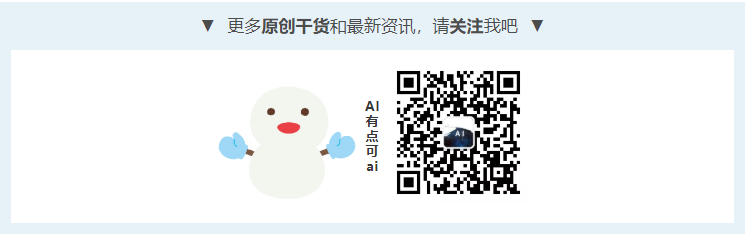
